In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

import warnings 
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Advertising.csv')

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.shape

(200, 5)

In [7]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


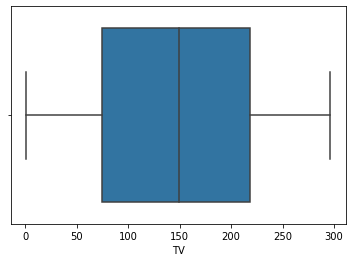

In [8]:
plt1 = sns.boxplot(data['TV'])

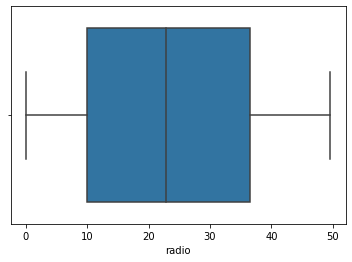

In [9]:
plt2 = sns.boxplot(data['radio'])

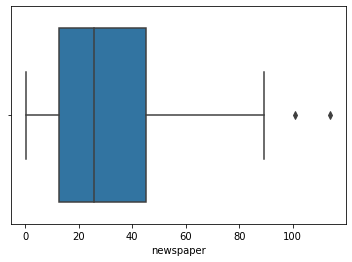

In [10]:
plt3 = sns.boxplot(data['newspaper'])

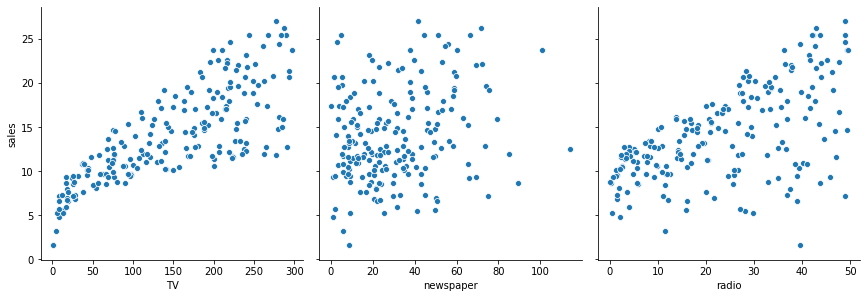

In [11]:
sns.pairplot(data, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

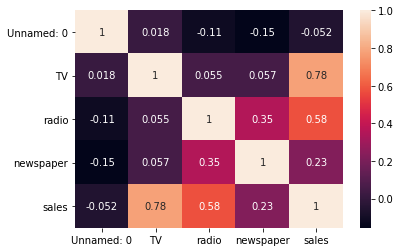

In [12]:
sns.heatmap(data.corr(), annot=True)

In [13]:
# PERFORMING LINEAR REGRESSION

X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [15]:
X_train.head()

,TV,radio,newspaper
98,289.7,42.3,51.2
123,123.1,34.6,12.4
119,19.4,16.0,22.3
53,182.6,46.2,58.7
33,265.6,20.0,0.3


In [16]:
y_train.head()

98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
Name: sales, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 1.40 		 1.97 		1.07 		0.92


In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

91.56213613792234 %


In [21]:
df=pd.DataFrame(y_pred_lr)
df.to_csv('Sales prediction model.csv')